<a href="https://colab.research.google.com/github/abbas070/MITFutureMakers/blob/main/mnist-digit-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model accuracy: 99.27%

The dataset can be found here: http://yann.lecun.com/exdb/mnist/.

You can now draw your own numbers (as many digits as you want) and the model will identify them, all without having to leave the notebook. The prediction works very well.

In [2]:
import cv2
import imutils
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from base64 import b64decode
from imutils import contours
from google.colab.output import eval_js
from IPython.display import HTML, Image
from google.colab.patches import cv2_imshow

from keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


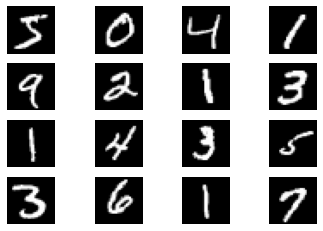

In [4]:
# Plot first few images
img_index = 0
f, axarr = plt.subplots(4, 4)

for x, y in np.ndindex((4, 4)):
  axarr[x,y].imshow(X_train[img_index], cmap=plt.get_cmap('gray'))
  axarr[x,y].axis("off")
  img_index += 1
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

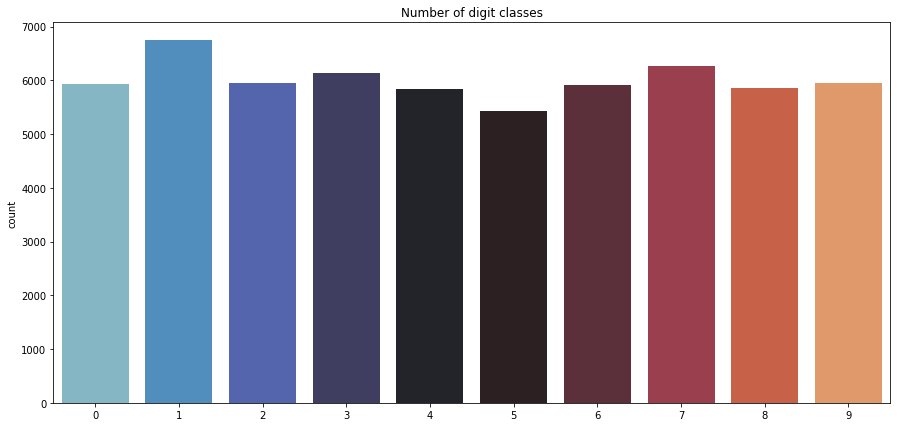

In [5]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
# y_train.value_counts()

In [6]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
# Use one hot encoding to transform the labels to data that the model can understand
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [9]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(y_train.shape[1], activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
  datagen.flow(X_train, y_train, batch_size=250),
  epochs=20,
  validation_data=(X_test, y_test)
)

Epoch 1/20
240/240 [==============================] - 26s 60ms/step - loss: 0.5963 - accuracy: 0.8110 - val_loss: 0.3107 - val_accuracy: 0.9180
Epoch 2/20
240/240 [==============================] - 14s 57ms/step - loss: 0.2157 - accuracy: 0.9320 - val_loss: 0.0688 - val_accuracy: 0.9801
Epoch 3/20
240/240 [==============================] - 15s 62ms/step - loss: 0.1642 - accuracy: 0.9493 - val_loss: 0.0649 - val_accuracy: 0.9787
Epoch 4/20
240/240 [==============================] - 14s 60ms/step - loss: 0.1366 - accuracy: 0.9571 - val_loss: 0.0570 - val_accuracy: 0.9818
Epoch 5/20
240/240 [==============================] - 14s 57ms/step - loss: 0.1199 - accuracy: 0.9630 - val_loss: 0.0467 - val_accuracy: 0.9850
Epoch 6/20
240/240 [==============================] - 19s 81ms/step - loss: 0.1061 - accuracy: 0.9673 - val_loss: 0.0434 - val_accuracy: 0.9861
Epoch 7/20
240/240 [==============================] - 14s 60ms/step - loss: 0.1010 - accuracy: 0.9681 - val_loss: 0.0567 - val_accuracy:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       1

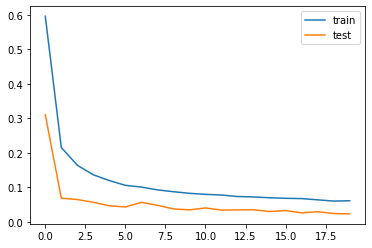

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0232 - accuracy: 0.9929


[0.023217234760522842, 0.992900013923645]

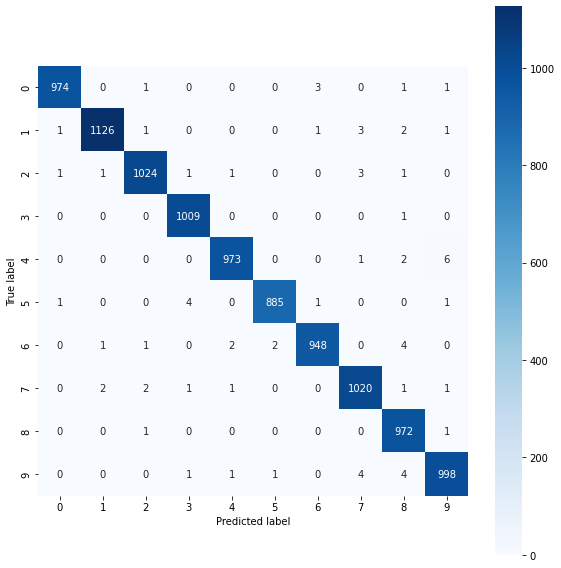

In [14]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

y_test_round = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_round, y_pred)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, square=True, fmt="")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [15]:
model.save("model.h5")


In [16]:
# Load the model
model = load_model("model.h5")

In [17]:
def pad_image(img):
  desired_size = 28
  old_size = img.shape[:2] # old_size is in (height, width) format
  ratio = float(desired_size)/max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])
  img = cv2.resize(img, (new_size[1], new_size[0]))

  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)

  color = [0, 0, 0]
  return cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

In [18]:
def make_prediction(path):
  predictions = []

  # Read image and convert to inverted grayscale
  img = cv2.imread(path)
  inverted = cv2.bitwise_not(img)
  gray = cv2.cvtColor(inverted, cv2.COLOR_BGR2GRAY)

  # Find the contours
  cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)

  # Sort the contours from left to right
  digitCnts = contours.sort_contours(cnts, method="left-to-right")[0]
  digits = []

  # Extract the portions bounded by the contours
  for c in digitCnts:
    x, y, w, h = cv2.boundingRect(c)
    roi = gray[y:y + h, x:x + w]
    digits.append(roi)

  for digit in digits:
    # Pad the image so that it's 28x28
    digit = pad_image(digit)    

    # Reshape 2d to 3d
    digit = digit.reshape(1, 28, 28, 1)

    # Normalize image
    digit = digit.astype('float32')
    digit = digit / 255.0

    predictions.append(np.argmax(model.predict(digit), axis=-1)[0])

  return predictions

In [19]:
# Adapted from https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca
canvas_html = """
<canvas width=%d height=%d></canvas>

<button>Finish</button>

<script>
  const canvas = document.querySelector('canvas');

  const ctx = canvas.getContext('2d');

  ctx.lineWidth = %d;
  ctx.fillStyle = 'white';
  ctx.fillRect(0, 0, canvas.width, canvas.height);

  const button = document.querySelector('button');

  const mouse = {x: 0, y: 0};

  canvas.addEventListener('mousemove', function(e) {
    mouse.x = e.pageX - this.offsetLeft
    mouse.y = e.pageY - this.offsetTop
  });

  canvas.onmousedown = () => {
    ctx.beginPath()
    ctx.moveTo(mouse.x, mouse.y)
    canvas.addEventListener('mousemove', onPaint)
  };

  canvas.onmouseup = () => {
    canvas.removeEventListener('mousemove', onPaint)
  };

  var onPaint = () => {
    ctx.lineTo(mouse.x, mouse.y)
    ctx.stroke()
  };

  var data = new Promise((resolve) => {
    button.onclick = ()=>{
      resolve(canvas.toDataURL('image/png'))
    }
  });
</script>
"""

def draw(filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [26]:
draw(filename="test.png", w=500, h=250, line_width=20)


8792

In [27]:
# Predict number
predictions = make_prediction("test.png")

print("".join([str(digit) for digit in predictions]))

259
